In [1]:
import matplotlib.pyplot as pyp
import scipy.stats as st
import pandas as p
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
def read_dataset(path, separ, en):
    return p.read_csv(path, sep = separ, encoding = en)

dataset = read_dataset("fullDataset.csv", ',', 'cp1252')
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  139483 non-null  int64  
 1   ID          139483 non-null  int64  
 2   Sex         139483 non-null  object 
 3   Age         139483 non-null  int64  
 4   Height      139483 non-null  int64  
 5   Weight      139483 non-null  int64  
 6   Team        139483 non-null  object 
 7   Year        139483 non-null  int64  
 8   Season      139483 non-null  object 
 9   Sport       139483 non-null  object 
 10  Medal       18968 non-null   object 
 11  Code        139483 non-null  object 
 12  GDP         139483 non-null  float64
 13  Population  139483 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.7+ MB


,Unnamed: 0,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal,Code,GDP,Population
0,0,1,M,24,180,80,China,1992,Summer,Basketball,NaN,CHN,4.269157e+11,1.164970e+09
1,1,2,M,23,170,60,China,2012,Summer,Judo,NaN,CHN,8.532230e+12,1.350695e+09
2,2,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
3,3,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
4,4,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07


In [3]:
drop_list = ["Unnamed: 0", "Sex", "Age", "Height", "Weight", "Team", "Sport"]
dataset["GDP per capita"] = dataset["GDP"] / dataset["Population"]

for str in drop_list:
    dataset = dataset.drop(str, axis = 1)

dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              139483 non-null  int64  
 1   Year            139483 non-null  int64  
 2   Season          139483 non-null  object 
 3   Medal           18968 non-null   object 
 4   Code            139483 non-null  object 
 5   GDP             139483 non-null  float64
 6   Population      139483 non-null  float64
 7   GDP per capita  139483 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


,ID,Year,Season,Medal,Code,GDP,Population,GDP per capita
0,1,1992,Summer,NaN,CHN,4.269157e+11,1.164970e+09,366.460692
1,2,2012,Summer,NaN,CHN,8.532230e+12,1.350695e+09,6316.918318
2,5,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07,17744.501384
3,5,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07,17744.501384
4,5,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07,23904.037415
5,5,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07,23904.037415
6,5,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07,24646.314310
7,5,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07,24646.314310
8,6,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08,25418.990776
9,6,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08,25418.990776


In [4]:
dataset = dataset.groupby(["Year", "Season", "Code"]).agg(GDP = ("GDP", "mean"),
                                                          Population = ("Population", "mean"),
                                                          Members = ("ID","nunique"),
                                                          GDP_p_c = ("GDP per capita", "mean"),
                                                          Medal = ("Medal", "count"))

dataset.info()

dataset.to_csv("check_r.csv", sep=',', encoding='utf-8')
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2258 entries, (1980, 'Summer', 'AFG') to (2016, 'Summer', 'ZWE')
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GDP         2258 non-null   float64
 1   Population  2258 non-null   float64
 2   Members     2258 non-null   int64  
 3   GDP_p_c     2258 non-null   float64
 4   Medal       2258 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 98.0+ KB


GDP   Population  Members       GDP_p_c  Medal
Year Season Code                                                         
1980 Summer AFG   3.641723e+09   13356511.0       11    272.655286      0
            AGO   5.934074e+09    8341289.0       11    711.409664      0
            AND   4.464161e+08      36067.0        2  12377.411646      0
            AUS   1.500323e+11   14692000.0      120  10211.837189     13
            AUT   8.205891e+10    7549433.0       83  10869.546494      5
            BEL   1.268293e+11    9859242.0       59  12864.002566      1
            BEN   1.405252e+09    3717165.0        7    378.043898      0
            BGR   1.983923e+10    8861535.0      264   2238.802958     89
            BRA   2.373935e+11  120694009.0      105   1966.903675      9
            BWA   1.060924e+09     897868.0        7   1181.603342      0

In [5]:
def kolm_smirn_check(dFrame, column):
    ks_statistic, p_value = st.kstest(dFrame[column], 'norm')
    if p_value > 0.05: return True
    return False

def pearson_check(dFrame, column):
    statistic, p_value = st.normaltest(dFrame[column])
    if p_value > 0.05: return True
    return False

print("#1 test - Kolmagorov-Smirnov test,\n#2 test - Pearson test\n")
for c in dataset.columns:
    print('{0:<15}'.format(c + ":"),f"#1 test - {kolm_smirn_check(dataset, c)}, #2 test - {pearson_check(dataset, c)};")

#1 test - Kolmagorov-Smirnov test,
#2 test - Pearson test

GDP:            #1 test - False, #2 test - False;
Population:     #1 test - False, #2 test - False;
Members:        #1 test - False, #2 test - False;
GDP_p_c:        #1 test - False, #2 test - False;
Medal:          #1 test - False, #2 test - False;


<AxesSubplot:>

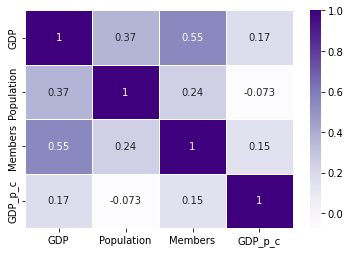

In [6]:
import seaborn as sns
datasetCorr = dataset.drop("Medal", axis = 1)
sns.heatmap(datasetCorr.corr(),annot=True,lw=1,cmap = "Purples")    

In [7]:
first = dataset.iloc[:, :4]
second = dataset['Medal']
f_train, f_test, s_train, s_test = train_test_split(first, second, test_size=0.3)

In [8]:
par = ["GDP", "Population", "Members", "GDP_p_c",
       ["GDP", "Population"],["GDP", "Members"],["GDP", "GDP_p_c"], ["Members", "Population"], ["Members", "GDP_p_c"], ["Population", "GDP_p_c"],
       ["GDP", "Population","Members"], ["GDP", "Population", "GDP_p_c"], ["GDP", "Members", "GDP_p_c"], ["Population", "Members", "GDP_p_c"],
       ["GDP", "Population", "Members", "GDP_p_c"]]

lin = []
pol = []
for i in range(len(par)):
    pol.append(make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()))
    if i < 4: 
        lin.append(LinearRegression().fit(f_train[par[i]].to_numpy().reshape(-1,1), s_train))
        pol[i].fit(f_train[par[i]].to_numpy().reshape(-1,1), s_train)
    else:
        lin.append(LinearRegression().fit(f_train[par[i]].values, s_train.values))
        pol[i].fit(f_train[par[i]].values, s_train.values)

In [9]:
prediction = []

def predict_by(prediction, s):
    for i in range(len(par)):
        if i < 4:
            prediction.append(s[i].predict(f_test[par[i]].to_numpy().reshape(-1,1)))
        else:
            prediction.append(s[i].predict(f_test[par[i]].values))
    return prediction

prediction = predict_by(prediction, lin)
prediction = predict_by(prediction, pol)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE = []
R2 = []
for i in range(len(prediction)):
    tempPred = prediction[i]
    MSE.append(mean_squared_error(s_test,tempPred))
    R2.append(r2_score(s_test,tempPred))
min_i = n.argmin(MSE)
min = MSE[min_i]
print("Best model is:")
if (min_i < 15):
    print(f"linear model by {par[min_i]} params")
else:
    print(f"polynomial model by {par[min_i - 15]} params")

Best model is:
polynomial model by ['Population', 'Members', 'GDP_p_c'] params


[334.23307061220544, 573.79334903186, 129.88825024225727, 551.6247533421034, 336.135722379087, 109.2128274541972, 333.3724894237666, 129.70716788629645, 129.72472101406987, 559.0710558058139, 109.0164026469801, 335.53753691510923, 109.33957679236502, 129.42603767726746, 109.1564723370735]


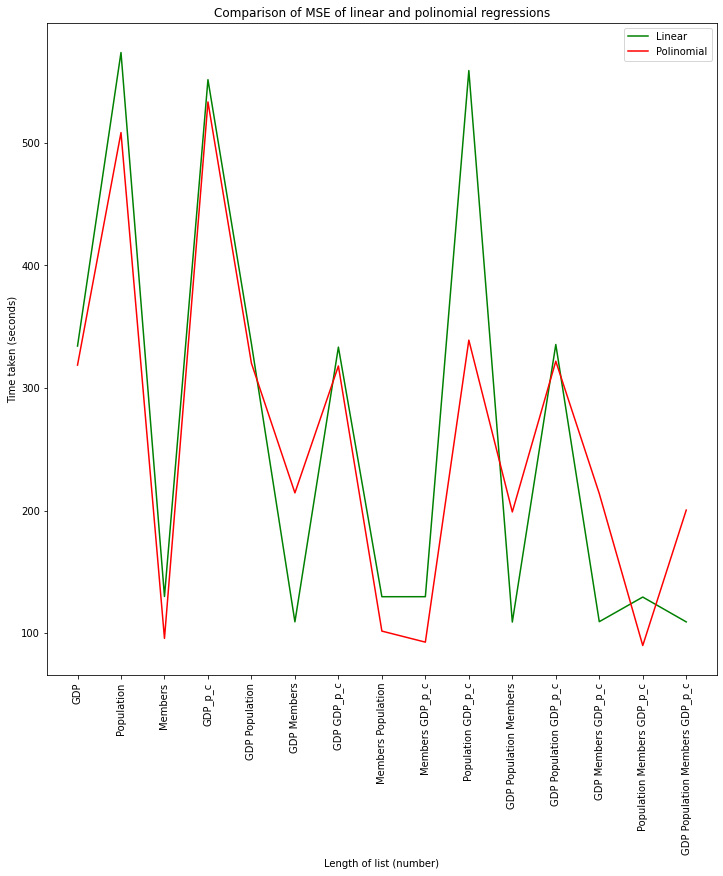

In [11]:
import matplotlib.pyplot as plt
params = ["GDP", "Population", "Members", "GDP_p_c",
       "GDP Population","GDP Members","GDP GDP_p_c", "Members Population", "Members GDP_p_c", "Population GDP_p_c",
       "GDP Population Members", "GDP Population GDP_p_c", "GDP Members GDP_p_c", "Population Members GDP_p_c",
       "GDP Population Members GDP_p_c"]
MSElin = MSE[0:15]
MSEpol = MSE[15:30]
print(MSElin)
plt.figure(figsize=(12,12))  
plt.plot(params,MSElin,color = 'green')
plt.plot(params,MSEpol,color = 'red')
plt.legend(['Linear', 'Polinomial'])
plt.title("Comparison of MSE of linear and polinomial regressions")
plt.xlabel("Length of list (number)")
plt.ylabel("Time taken (seconds)")
plt.xticks(rotation=90)
plt.show()

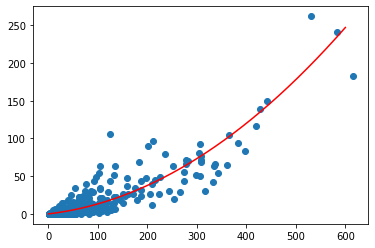

In [12]:
mymodel = n.poly1d(n.polyfit(f_test["Members"], prediction[17] , 2))

myline = n.linspace(0, 600, 600)

pyp.scatter(f_test["Members"], s_test)
plt.plot(myline, mymodel(myline), color = "red")
plt.show()

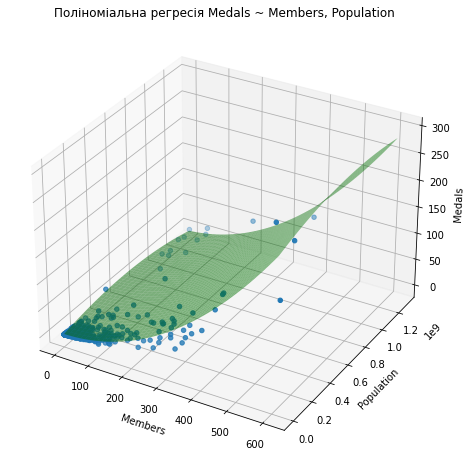

In [13]:
from mpl_toolkits.mplot3d import Axes3D

params = ['Members', 'Population']
params_values = []

for i in range(len(params)):
    values = n.linspace(f_test[params[i]].min(), f_test[params[i]].max()).reshape(-1, 1)
    params_values.append(values)


fig = pyp.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

X_3d = params_values[0]
Y_3d = params_values[1]

XX, YY = n.meshgrid(X_3d, Y_3d)

Z = []
for i in range(len(Y_3d)):
    temp = []
    for j in range(len(X_3d)):
        temp.append(pol[7].predict(n.array([X_3d[j], Y_3d[i]]).T)[0])
    Z.append(temp)
    
Z = n.array(Z)

ax.set_title('Поліноміальна регресія Medals ~ Members, Population')
ax.set_xlabel('Members')
ax.set_ylabel('Population')
ax.set_zlabel('Medals')
ax.plot_surface(
    XX, YY,
    n.array(Z),
    color='green',
    alpha=0.5
)
ax.scatter(f_test['Members'], f_test['Population'], s_test)
pyp.show()

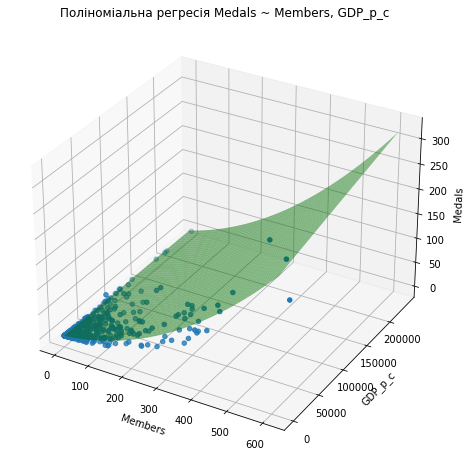

In [14]:
params = ['Members', 'GDP_p_c']
params_values = []

for i in range(len(params)):
    values = n.linspace(f_test[params[i]].min(), f_test[params[i]].max()).reshape(-1, 1)
    params_values.append(values)


fig = pyp.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

X_3d = params_values[0]
Y_3d = params_values[1]

XX, YY = n.meshgrid(X_3d, Y_3d)

Z = []
for i in range(len(Y_3d)):
    temp = []
    for j in range(len(X_3d)):
        temp.append(pol[8].predict(n.array([X_3d[j], Y_3d[i]]).T)[0])
    Z.append(temp)
    
Z = n.array(Z)

ax.set_title('Поліноміальна регресія Medals ~ Members, GDP_p_c')
ax.set_xlabel('Members')
ax.set_ylabel('GDP_p_c')
ax.set_zlabel('Medals')
ax.plot_surface(
    XX, YY,
    n.array(Z),
    color='green',
    alpha=0.5
)
ax.scatter(f_test['Members'], f_test['GDP_p_c'], s_test)
pyp.show()

In [15]:
arr = pol[2].predict(f_test[par[2]].to_numpy().reshape(-1,1))
sum = 0
count = 0
for i in arr:
    print(i)
    count += 1
    sum += i

print(f"avg {sum / count}")

0.10839995145240149
0.34777577197609805
0.1870759371694439
0.6825668950796836
7.244446107168698
14.267754540518563
0.34777577197609805
0.4297996210657098
8.310748966563668
4.003685647441676
0.10839995145240149
3.06627433142896
0.10839995145240149
37.15218589465082
0.856658183376615
12.017975996612021
2.2002841006977225
7.847066300077828
0.10839995145240149
0.1870759371694439
1.311415607125598
1.218232213460755
0.34777577197609805
0.34777577197609805
0.34777577197609805
0.4297996210657098
19.47092211026163
32.80831522181718
0.856658183376615
1.5011302578278527
0.34777577197609805
0.2668678773440094
1.8939510127226398
0.5129394246128446
2.3046270389377965
1.5011302578278527
0.2668678773440094
0.1870759371694439
0.2668678773440094
26.635385621409867
2.733158336473323
0.5129394246128446
0.7690545619993878
5.543717156363524
0.34777577197609805
15.053391264461483
9.596338073323594
0.856658183376615
0.856658183376615
2.4100859316353933
0.4297996210657098
0.5971951826175026
0.10839995145240149

In [16]:
sum_d = 0
count_d = 0
for i in range(len(dataset)):
    count_d += 1
    sum_d += dataset.iloc[i, 4]

print(f"avg {sum_d / count_d}")

avg 8.400354295837024
